![](https://i.imgur.com/KJ1eMqF.jpg)

# Proyecto Visualización Datos dede API Ghilbli con Python

Para este proyecto, se utilizara la documentación de la [Api de Studio Ghilbli](https://ghibliapi.herokuapp.com/) que se encuentra en su versión **1.0.1** y se utilizara **python** para su extración de datos

### Contenido
1. Librerias
2. Requests
3. Manejo de Datos
    1. Iteración de los datos
4. Visualización de datos
    1. Importamos Pandas y Matploly
    2. Obtendremos los films que realizo el director "Hayap Miyazaki"
        1. Evaluaremos la calificación que obtuvo cada film
    3. People
    4. Las mejores 5 películas de studio Ghilbli
    5. Locations
    6. Species
    7. Vehicles

## 1. Librerias

Para consumir la API, utilizaremos la libreria requests

In [1]:
import requests

## 2. Request

+ Dentro de la documentación, nos indica que debemos utilizar la base url = 'https://ghibliapi.herokuapp.com/' y los **ENDPONTS** que podemos visualizar

    + FILS
    + PEOPLE
    + LOCATION
    + SPECIES
    + VEHICLES
    
Así que para los films utilizaremos la siguiente url:

In [2]:
url = 'https://ghibliapi.herokuapp.com/films'

Y hacemos la petición y la guardamos en una variable response. Despues validamos si la petición fue existosa evaluando el status.code de nuestra variable siendo 200 (Para más información buscar información sobre las respuestas de response) 

```
response = requests.get(url)

if response.status_code == 200:
  # Your code

```

Asi que guardaremos los datos obtenidos en nuestra variable, haremos una conversion json() 

```
films = response.json()

```

y ahora si, ejecutamos todo este bloque de codigo junto (TARDARA UN POCO EN OBTENER LOS DATOS)

In [3]:
response = requests.get(url)

if response.status_code == 200:
    
    films = response.json()

# 3. Manejo de datos

Ahora que obtuvimos una respuesta exitosa y obtuvimos de la API los datos de los 'films' podemos manejar de forma más sencilla los datos

In [4]:
films

[{'id': '2baf70d1-42bb-4437-b551-e5fed5a87abe',
  'title': 'Castle in the Sky',
  'description': "The orphan Sheeta inherited a mysterious crystal that links her to the mythical sky-kingdom of Laputa. With the help of resourceful Pazu and a rollicking band of sky pirates, she makes her way to the ruins of the once-great civilization. Sheeta and Pazu must outwit the evil Muska, who plans to use Laputa's science to make himself ruler of the world.",
  'director': 'Hayao Miyazaki',
  'producer': 'Isao Takahata',
  'release_date': '1986',
  'rt_score': '95',
  'people': ['https://ghibliapi.herokuapp.com/people/'],
  'species': ['https://ghibliapi.herokuapp.com/species/af3910a6-429f-4c74-9ad5-dfe1c4aa04f2'],
  'locations': ['https://ghibliapi.herokuapp.com/locations/'],
  'vehicles': ['https://ghibliapi.herokuapp.com/vehicles/'],
  'url': 'https://ghibliapi.herokuapp.com/films/2baf70d1-42bb-4437-b551-e5fed5a87abe'},
 {'id': '12cfb892-aac0-4c5b-94af-521852e46d6a',
  'title': 'Grave of the Fi

Obtenemos la primera pelicula dentro de nuestro json obteniendo su indice

In [6]:
films[0]

{'id': '2baf70d1-42bb-4437-b551-e5fed5a87abe',
 'title': 'Castle in the Sky',
 'description': "The orphan Sheeta inherited a mysterious crystal that links her to the mythical sky-kingdom of Laputa. With the help of resourceful Pazu and a rollicking band of sky pirates, she makes her way to the ruins of the once-great civilization. Sheeta and Pazu must outwit the evil Muska, who plans to use Laputa's science to make himself ruler of the world.",
 'director': 'Hayao Miyazaki',
 'producer': 'Isao Takahata',
 'release_date': '1986',
 'rt_score': '95',
 'people': ['https://ghibliapi.herokuapp.com/people/'],
 'species': ['https://ghibliapi.herokuapp.com/species/af3910a6-429f-4c74-9ad5-dfe1c4aa04f2'],
 'locations': ['https://ghibliapi.herokuapp.com/locations/'],
 'vehicles': ['https://ghibliapi.herokuapp.com/vehicles/'],
 'url': 'https://ghibliapi.herokuapp.com/films/2baf70d1-42bb-4437-b551-e5fed5a87abe'}

Para obtener un valor dentro de una llave, mandamos a llamar el espacio de su indice y la llave que nos gustaria ver

In [7]:
films[0]['title']

'Castle in the Sky'

### 3.1 Iteración de los datos

Ahora que tenemos los datos y sabemos como obtener datos por su indice y llave, podemos iterar para obtener datos interesantes

#### Obten er longitud total de películas que existen

In [9]:
len(films)

20

Aunque son 22, en la Api solo muestran 20

¿Cómo podemos saber cuales son las películas que si hay?

#### Obtener todas las películas

In [11]:
for film in films:
    print(film['title'])

Castle in the Sky
Grave of the Fireflies
My Neighbor Totoro
Kiki's Delivery Service
Only Yesterday
Porco Rosso
Pom Poko
Whisper of the Heart
Princess Mononoke
My Neighbors the Yamadas
Spirited Away
The Cat Returns
Howl's Moving Castle
Tales from Earthsea
Ponyo
Arrietty
From Up on Poppy Hill
The Wind Rises
The Tale of the Princess Kaguya
When Marnie Was There


## 4. Visualización de datos.

A partir de aqui termina la explicación de como mandar a llamar la API y como manejar los datos.

### 4.1 Importamos Pandas y Matploly

In [25]:
import pandas as pd

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
urlFilms = 'https://ghibliapi.herokuapp.com/films'
urlPeople = 'https://ghibliapi.herokuapp.com/people'
urlLocation = 'https://ghibliapi.herokuapp.com/locations'
urlSpecies = 'https://ghibliapi.herokuapp.com/species'
urlVehicles = 'https://ghibliapi.herokuapp.com/vehicles'

In [156]:
%%time
response1 = requests.get(urlFilms)
response2 = requests.get(urlPeople)
response3 = requests.get(urlLocation)
response4 = requests.get(urlSpecies)
response5 = requests.get(urlVehicles)

films = response1.json()
people = response2.json()
location = response3.json()
species = response4.json()
vehicles = response5.json()

Wall time: 4min 24s


In [87]:
df = pd.DataFrame(films)
df

,id,title,description,director,producer,release_date,rt_score,people,species,locations,vehicles,url
0,2baf70d1-42bb-4437-b551-e5fed5a87abe,Castle in the Sky,The orphan Sheeta inherited a mysterious cryst...,Hayao Miyazaki,Isao Takahata,1986,95,[https://ghibliapi.herokuapp.com/people/],[https://ghibliapi.herokuapp.com/species/af391...,[https://ghibliapi.herokuapp.com/locations/],[https://ghibliapi.herokuapp.com/vehicles/],https://ghibliapi.herokuapp.com/films/2baf70d1...
1,12cfb892-aac0-4c5b-94af-521852e46d6a,Grave of the Fireflies,"In the latter part of World War II, a boy and ...",Isao Takahata,Toru Hara,1988,97,[https://ghibliapi.herokuapp.com/people/],[https://ghibliapi.herokuapp.com/species/af391...,[https://ghibliapi.herokuapp.com/locations/],[https://ghibliapi.herokuapp.com/vehicles/],https://ghibliapi.herokuapp.com/films/12cfb892...
2,58611129-2dbc-4a81-a72f-77ddfc1b1b49,My Neighbor Totoro,Two sisters move to the country with their fat...,Hayao Miyazaki,Hayao Miyazaki,1988,93,[https://ghibliapi.herokuapp.com/people/986faa...,[https://ghibliapi.herokuapp.com/species/af391...,[https://ghibliapi.herokuapp.com/locations/],[https://ghibliapi.herokuapp.com/vehicles/],https://ghibliapi.herokuapp.com/films/58611129...
3,ea660b10-85c4-4ae3-8a5f-41cea3648e3e,Kiki's Delivery Service,"A young witch, on her mandatory year of indepe...",Hayao Miyazaki,Hayao Miyazaki,1989,96,[https://ghibliapi.herokuapp.com/people/],[https://ghibliapi.herokuapp.com/species/af391...,[https://ghibliapi.herokuapp.com/locations/],[https://ghibliapi.herokuapp.com/vehicles/],https://ghibliapi.herokuapp.com/films/ea660b10...
4,4e236f34-b981-41c3-8c65-f8c9000b94e7,Only Yesterday,"It’s 1982, and Taeko is 27 years old, unmarrie...",Isao Takahata,Toshio Suzuki,1991,100,[https://ghibliapi.herokuapp.com/people/],[https://ghibliapi.herokuapp.com/species/af391...,[https://ghibliapi.herokuapp.com/locations/],[https://ghibliapi.herokuapp.com/vehicles/],https://ghibliapi.herokuapp.com/films/4e236f34...
5,ebbb6b7c-945c-41ee-a792-de0e43191bd8,Porco Rosso,"Porco Rosso, known in Japan as Crimson Pig (Ku...",Hayao Miyazaki,Toshio Suzuki,1992,94,[https://ghibliapi.herokuapp.com/people/],[https://ghibliapi.herokuapp.com/species/af391...,[https://ghibliapi.herokuapp.com/locations/],[https://ghibliapi.herokuapp.com/vehicles/],https://ghibliapi.herokuapp.com/films/ebbb6b7c...
6,1b67aa9a-2e4a-45af-ac98-64d6ad15b16c,Pom Poko,As the human city development encroaches on th...,Isao Takahata,Toshio Suzuki,1994,78,[https://ghibliapi.herokuapp.com/people/],[https://ghibliapi.herokuapp.com/species/af391...,[https://ghibliapi.herokuapp.com/locations/],[https://ghibliapi.herokuapp.com/vehicles/],https://ghibliapi.herokuapp.com/films/1b67aa9a...
7,ff24da26-a969-4f0e-ba1e-a122ead6c6e3,Whisper of the Heart,"Shizuku lives a simple life, dominated by her ...",Yoshifumi Kondō,Toshio Suzuki,1995,91,[https://ghibliapi.herokuapp.com/people/],[https://ghibliapi.herokuapp.com/species/af391...,[https://ghibliapi.herokuapp.com/locations/],[https://ghibliapi.herokuapp.com/vehicles/],https://ghibliapi.herokuapp.com/films/ff24da26...
8,0440483e-ca0e-4120-8c50-4c8cd9b965d6,Princess Mononoke,"Ashitaka, a prince of the disappearing Ainu tr...",Hayao Miyazaki,Toshio Suzuki,1997,92,[https://ghibliapi.herokuapp.com/people/ba9246...,[https://ghibliapi.herokuapp.com/species/af391...,[https://ghibliapi.herokuapp.com/locations/],[https://ghibliapi.herokuapp.com/vehicles/],https://ghibliapi.herokuapp.com/films/0440483e...
9,45204234-adfd-45cb-a505-a8e7a676b114,My Neighbors the Yamadas,The Yamadas are a typical middle class Japanes...,Isao Takahata,Toshio Suzuki,1999,75,[https://ghibliapi.herokuapp.com/people/],[https://ghibliapi.herokuapp.com/species/af391...,[https://ghibliapi.herokuapp.com/locations/],[https://ghibliapi.herokuapp.com/vehicles/],https://ghibliapi.herokuapp.com/films/45204234...


* Ahora que tenemos los datos, podemos saber varios insights:
    * Directores de cada pelicula
    * El score que tuvo cada película

### 4.2.1 Obtendremos los films que realizo el director "Hayap Miyazaki"

In [88]:
df.director

0           Hayao Miyazaki
1            Isao Takahata
2           Hayao Miyazaki
3           Hayao Miyazaki
4            Isao Takahata
5           Hayao Miyazaki
6            Isao Takahata
7          Yoshifumi Kondō
8           Hayao Miyazaki
9            Isao Takahata
10          Hayao Miyazaki
11         Hiroyuki Morita
12          Hayao Miyazaki
13           Gorō Miyazaki
14          Hayao Miyazaki
15    Hiromasa Yonebayashi
16           Gorō Miyazaki
17          Hayao Miyazaki
18           Isao Takahata
19    Hiromasa Yonebayashi
Name: director, dtype: object

In [89]:
df.director.value_counts()

Hayao Miyazaki          9
Isao Takahata           5
Gorō Miyazaki           2
Hiromasa Yonebayashi    2
Hiroyuki Morita         1
Yoshifumi Kondō         1
Name: director, dtype: int64

Vemos que el director 'Hayao Miyazaki' estuvo presente en 9 films, veamos cuales fueron

In [90]:
df[df.director == "Hayao Miyazaki"]

,id,title,description,director,producer,release_date,rt_score,people,species,locations,vehicles,url
0,2baf70d1-42bb-4437-b551-e5fed5a87abe,Castle in the Sky,The orphan Sheeta inherited a mysterious cryst...,Hayao Miyazaki,Isao Takahata,1986,95,[https://ghibliapi.herokuapp.com/people/],[https://ghibliapi.herokuapp.com/species/af391...,[https://ghibliapi.herokuapp.com/locations/],[https://ghibliapi.herokuapp.com/vehicles/],https://ghibliapi.herokuapp.com/films/2baf70d1...
2,58611129-2dbc-4a81-a72f-77ddfc1b1b49,My Neighbor Totoro,Two sisters move to the country with their fat...,Hayao Miyazaki,Hayao Miyazaki,1988,93,[https://ghibliapi.herokuapp.com/people/986faa...,[https://ghibliapi.herokuapp.com/species/af391...,[https://ghibliapi.herokuapp.com/locations/],[https://ghibliapi.herokuapp.com/vehicles/],https://ghibliapi.herokuapp.com/films/58611129...
3,ea660b10-85c4-4ae3-8a5f-41cea3648e3e,Kiki's Delivery Service,"A young witch, on her mandatory year of indepe...",Hayao Miyazaki,Hayao Miyazaki,1989,96,[https://ghibliapi.herokuapp.com/people/],[https://ghibliapi.herokuapp.com/species/af391...,[https://ghibliapi.herokuapp.com/locations/],[https://ghibliapi.herokuapp.com/vehicles/],https://ghibliapi.herokuapp.com/films/ea660b10...
5,ebbb6b7c-945c-41ee-a792-de0e43191bd8,Porco Rosso,"Porco Rosso, known in Japan as Crimson Pig (Ku...",Hayao Miyazaki,Toshio Suzuki,1992,94,[https://ghibliapi.herokuapp.com/people/],[https://ghibliapi.herokuapp.com/species/af391...,[https://ghibliapi.herokuapp.com/locations/],[https://ghibliapi.herokuapp.com/vehicles/],https://ghibliapi.herokuapp.com/films/ebbb6b7c...
8,0440483e-ca0e-4120-8c50-4c8cd9b965d6,Princess Mononoke,"Ashitaka, a prince of the disappearing Ainu tr...",Hayao Miyazaki,Toshio Suzuki,1997,92,[https://ghibliapi.herokuapp.com/people/ba9246...,[https://ghibliapi.herokuapp.com/species/af391...,[https://ghibliapi.herokuapp.com/locations/],[https://ghibliapi.herokuapp.com/vehicles/],https://ghibliapi.herokuapp.com/films/0440483e...
10,dc2e6bd1-8156-4886-adff-b39e6043af0c,Spirited Away,Spirited Away is an Oscar winning Japanese ani...,Hayao Miyazaki,Toshio Suzuki,2001,97,[https://ghibliapi.herokuapp.com/people/],[https://ghibliapi.herokuapp.com/species/af391...,[https://ghibliapi.herokuapp.com/locations/],[https://ghibliapi.herokuapp.com/vehicles/],https://ghibliapi.herokuapp.com/films/dc2e6bd1...
12,cd3d059c-09f4-4ff3-8d63-bc765a5184fa,Howl's Moving Castle,"When Sophie, a shy young woman, is cursed with...",Hayao Miyazaki,Toshio Suzuki,2004,87,[https://ghibliapi.herokuapp.com/people/],[https://ghibliapi.herokuapp.com/species/af391...,[https://ghibliapi.herokuapp.com/locations/],[https://ghibliapi.herokuapp.com/vehicles/],https://ghibliapi.herokuapp.com/films/cd3d059c...
14,758bf02e-3122-46e0-884e-67cf83df1786,Ponyo,"The son of a sailor, 5-year old Sosuke lives a...",Hayao Miyazaki,Toshio Suzuki,2008,92,[https://ghibliapi.herokuapp.com/people/],[https://ghibliapi.herokuapp.com/species/af391...,[https://ghibliapi.herokuapp.com/locations/],[https://ghibliapi.herokuapp.com/vehicles/],https://ghibliapi.herokuapp.com/films/758bf02e...
17,67405111-37a5-438f-81cc-4666af60c800,The Wind Rises,A lifelong love of flight inspires Japanese av...,Hayao Miyazaki,Toshio Suzuki,2013,89,[https://ghibliapi.herokuapp.com/people/],[https://ghibliapi.herokuapp.com/species/af391...,[https://ghibliapi.herokuapp.com/locations/],[https://ghibliapi.herokuapp.com/vehicles/],https://ghibliapi.herokuapp.com/films/67405111...


In [91]:
df[df.director == "Hayao Miyazaki"].title

0           Castle in the Sky
2          My Neighbor Totoro
3     Kiki's Delivery Service
5                 Porco Rosso
8           Princess Mononoke
10              Spirited Away
12       Howl's Moving Castle
14                      Ponyo
17             The Wind Rises
Name: title, dtype: object

Visualizaremos en una gráfica en de pastel como fue la distribuición de los directores

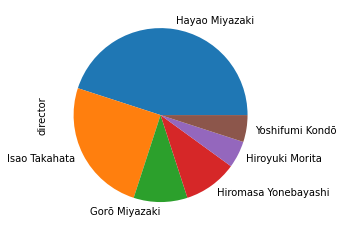

In [92]:
df.director.value_counts().plot(kind="pie")

### 4.2.2 Evaluaremos la calificación que obtuvo cada film

Como los valores de rt_score los tenemos en string, los pasaremos a una nueva columan transformada en entero cada elemento

In [94]:
df["rt_scoreINT"] = ""

In [109]:
valores = df.rt_score.astype(int)

In [110]:
valores

0      95
1      97
2      93
3      96
4     100
5      94
6      78
7      91
8      92
9      75
10     97
11     89
12     87
13     41
14     92
15     95
16     83
17     89
18    100
19     92
Name: rt_score, dtype: int32

In [111]:
df["rt_scoreINT"] = valores

In [118]:
df.head()

,id,title,description,director,producer,release_date,rt_score,people,species,locations,vehicles,url,rt_scoreINT
0,2baf70d1-42bb-4437-b551-e5fed5a87abe,Castle in the Sky,The orphan Sheeta inherited a mysterious cryst...,Hayao Miyazaki,Isao Takahata,1986,95,[https://ghibliapi.herokuapp.com/people/],[https://ghibliapi.herokuapp.com/species/af391...,[https://ghibliapi.herokuapp.com/locations/],[https://ghibliapi.herokuapp.com/vehicles/],https://ghibliapi.herokuapp.com/films/2baf70d1...,95
1,12cfb892-aac0-4c5b-94af-521852e46d6a,Grave of the Fireflies,"In the latter part of World War II, a boy and ...",Isao Takahata,Toru Hara,1988,97,[https://ghibliapi.herokuapp.com/people/],[https://ghibliapi.herokuapp.com/species/af391...,[https://ghibliapi.herokuapp.com/locations/],[https://ghibliapi.herokuapp.com/vehicles/],https://ghibliapi.herokuapp.com/films/12cfb892...,97
2,58611129-2dbc-4a81-a72f-77ddfc1b1b49,My Neighbor Totoro,Two sisters move to the country with their fat...,Hayao Miyazaki,Hayao Miyazaki,1988,93,[https://ghibliapi.herokuapp.com/people/986faa...,[https://ghibliapi.herokuapp.com/species/af391...,[https://ghibliapi.herokuapp.com/locations/],[https://ghibliapi.herokuapp.com/vehicles/],https://ghibliapi.herokuapp.com/films/58611129...,93
3,ea660b10-85c4-4ae3-8a5f-41cea3648e3e,Kiki's Delivery Service,"A young witch, on her mandatory year of indepe...",Hayao Miyazaki,Hayao Miyazaki,1989,96,[https://ghibliapi.herokuapp.com/people/],[https://ghibliapi.herokuapp.com/species/af391...,[https://ghibliapi.herokuapp.com/locations/],[https://ghibliapi.herokuapp.com/vehicles/],https://ghibliapi.herokuapp.com/films/ea660b10...,96
4,4e236f34-b981-41c3-8c65-f8c9000b94e7,Only Yesterday,"It’s 1982, and Taeko is 27 years old, unmarrie...",Isao Takahata,Toshio Suzuki,1991,100,[https://ghibliapi.herokuapp.com/people/],[https://ghibliapi.herokuapp.com/species/af391...,[https://ghibliapi.herokuapp.com/locations/],[https://ghibliapi.herokuapp.com/vehicles/],https://ghibliapi.herokuapp.com/films/4e236f34...,100


In [ ]:
Ya tenemos una columna con los datos de rt_score trasnformados a entero

In [113]:
df.rt_scoreINT.sort_values()

13     41
9      75
6      78
16     83
12     87
17     89
11     89
7      91
14     92
19     92
8      92
2      93
5      94
15     95
0      95
3      96
10     97
1      97
4     100
18    100
Name: rt_scoreINT, dtype: int32

In [116]:
df.rt_scoreINT.sort_values().value_counts()

92     3
95     2
89     2
100    2
97     2
94     1
93     1
91     1
87     1
83     1
78     1
75     1
41     1
96     1
Name: rt_scoreINT, dtype: int64

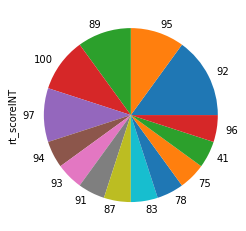

In [117]:
df.rt_scoreINT.sort_values().value_counts().plot(kind="pie")

### 4.3 People 

In [64]:
people

[{'id': 'fe93adf2-2f3a-4ec4-9f68-5422f1b87c01',
  'name': 'Pazu',
  'gender': 'Male',
  'age': '13',
  'eye_color': 'Black',
  'hair_color': 'Brown',
  'films': ['https://ghibliapi.herokuapp.com/films/2baf70d1-42bb-4437-b551-e5fed5a87abe'],
  'species': 'https://ghibliapi.herokuapp.com/species/af3910a6-429f-4c74-9ad5-dfe1c4aa04f2',
  'url': 'https://ghibliapi.herokuapp.com/people/fe93adf2-2f3a-4ec4-9f68-5422f1b87c01'},
 {'id': '598f7048-74ff-41e0-92ef-87dc1ad980a9',
  'name': 'Lusheeta Toel Ul Laputa',
  'gender': 'Female',
  'age': '13',
  'eye_color': 'Black',
  'hair_color': 'Black',
  'films': ['https://ghibliapi.herokuapp.com/films/2baf70d1-42bb-4437-b551-e5fed5a87abe'],
  'species': 'https://ghibliapi.herokuapp.com/species/af3910a6-429f-4c74-9ad5-dfe1c4aa04f2',
  'url': 'https://ghibliapi.herokuapp.com/people/598f7048-74ff-41e0-92ef-87dc1ad980a9'},
 {'id': '3bc0b41e-3569-4d20-ae73-2da329bf0786',
  'name': 'Dola',
  'gender': 'Female',
  'age': '60',
  'eye_color': 'Black',
  'hai

In [65]:
len(people)

43

Tenemos que contamos con 43 personajes (no son todos)

In [67]:
for i in people:
    print(i['name'])

Pazu
Lusheeta Toel Ul Laputa
Dola
Romska Palo Ul Laputa
Uncle Pom
General Muoro
Duffi
Louis
Charles
Henri
Motro
Okami
Ashitaka
San
Eboshi
Jigo
Kohroku
Gonza
Hii-sama
Yakul
Shishigami
Moro
Jiji
Satsuki Kusakabe
Mei Kusakabe
Tatsuo Kusakabe
Yasuko Kusakabe
Granny
Kanta Ogaki
Totoro
Chu Totoro
Chibi Totoro
Catbus
Niya
Renaldo Moon aka Moon aka Muta
Cat King
Yuki
Haru
Baron Humbert von Gikkingen
Natori
Colonel Muska
Porco Rosso
Sosuke


In [68]:
peopledf = pd.DataFrame(people)
peopledf

,id,name,gender,age,eye_color,hair_color,films,species,url
0,fe93adf2-2f3a-4ec4-9f68-5422f1b87c01,Pazu,Male,13,Black,Brown,[https://ghibliapi.herokuapp.com/films/2baf70d...,https://ghibliapi.herokuapp.com/species/af3910...,https://ghibliapi.herokuapp.com/people/fe93adf...
1,598f7048-74ff-41e0-92ef-87dc1ad980a9,Lusheeta Toel Ul Laputa,Female,13,Black,Black,[https://ghibliapi.herokuapp.com/films/2baf70d...,https://ghibliapi.herokuapp.com/species/af3910...,https://ghibliapi.herokuapp.com/people/598f704...
2,3bc0b41e-3569-4d20-ae73-2da329bf0786,Dola,Female,60,Black,Peach,[https://ghibliapi.herokuapp.com/films/2baf70d...,https://ghibliapi.herokuapp.com/species/af3910...,https://ghibliapi.herokuapp.com/people/3bc0b41...
3,abe886e7-30c8-4c19-aaa5-d666e60d14de,Romska Palo Ul Laputa,Male,33,Black,Brown,[https://ghibliapi.herokuapp.com/films/2baf70d...,https://ghibliapi.herokuapp.com/species/af3910...,https://ghibliapi.herokuapp.com/people/abe886e...
4,e08880d0-6938-44f3-b179-81947e7873fc,Uncle Pom,Male,Unspecified/Elderly,Black,White,[https://ghibliapi.herokuapp.com/films/2baf70d...,https://ghibliapi.herokuapp.com/species/af3910...,https://ghibliapi.herokuapp.com/people/e08880d...
5,5c83c12a-62d5-4e92-8672-33ac76ae1fa0,General Muoro,Male,Unspecified/Adult,Black,None,[https://ghibliapi.herokuapp.com/films/2baf70d...,https://ghibliapi.herokuapp.com/species/af3910...,https://ghibliapi.herokuapp.com/people/5c83c12...
6,3f4c408b-0bcc-45a0-bc8b-20ffc67a2ede,Duffi,Male,Unspecified/Adult,Dark brown,Dark brown,[https://ghibliapi.herokuapp.com/films/2baf70d...,https://ghibliapi.herokuapp.com/species/af3910...,https://ghibliapi.herokuapp.com/people/3f4c408...
7,fcb4a2ac-5e41-4d54-9bba-33068db083ca,Louis,Male,30,Dark brown,Dark brown,[https://ghibliapi.herokuapp.com/films/2baf70d...,https://ghibliapi.herokuapp.com/species/af3910...,https://ghibliapi.herokuapp.com/people/fcb4a2a...
8,2cb76c15-772a-4cb3-9919-3652f56611d0,Charles,Male,Unspecified/Adult,Dark brown,Light brown,[https://ghibliapi.herokuapp.com/films/2baf70d...,https://ghibliapi.herokuapp.com/species/af3910...,https://ghibliapi.herokuapp.com/people/2cb76c1...
9,f6f2c477-98aa-4796-b9aa-8209fdeed6b9,Henri,Male,Unspecified/Adult,Dark brown,Reddish brown,[https://ghibliapi.herokuapp.com/films/2baf70d...,https://ghibliapi.herokuapp.com/species/af3910...,https://ghibliapi.herokuapp.com/people/f6f2c47...


Los insight que podemos sacar son:
    * ¿Cuantos tenemos de genero female y male 

In [75]:
peopledf[peopledf.gender == "Female" ]

,id,name,gender,age,eye_color,hair_color,films,species,url
1,598f7048-74ff-41e0-92ef-87dc1ad980a9,Lusheeta Toel Ul Laputa,Female,13,Black,Black,[https://ghibliapi.herokuapp.com/films/2baf70d...,https://ghibliapi.herokuapp.com/species/af3910...,https://ghibliapi.herokuapp.com/people/598f704...
2,3bc0b41e-3569-4d20-ae73-2da329bf0786,Dola,Female,60,Black,Peach,[https://ghibliapi.herokuapp.com/films/2baf70d...,https://ghibliapi.herokuapp.com/species/af3910...,https://ghibliapi.herokuapp.com/people/3bc0b41...
11,b22a684f-1819-40c8-94a6-d40c3b5e18eb,Okami,Female,50,Dark brown,Orange,[https://ghibliapi.herokuapp.com/films/2baf70d...,https://ghibliapi.herokuapp.com/species/af3910...,https://ghibliapi.herokuapp.com/people/b22a684...
13,ebe40383-aad2-4208-90ab-698f00c581ab,San,Female,17,Brown,Brown,[https://ghibliapi.herokuapp.com/films/0440483...,https://ghibliapi.herokuapp.com/species/af3910...,https://ghibliapi.herokuapp.com/people/ebe4038...
14,34277bec-7401-43fa-a00a-5aee64b45b08,Eboshi,Female,Unspecified/Adult,Hazel,Black,[https://ghibliapi.herokuapp.com/films/0440483...,https://ghibliapi.herokuapp.com/species/af3910...,https://ghibliapi.herokuapp.com/people/34277be...
18,116bfe1b-3ba8-4fa0-8f72-88537a493cb9,Hii-sama,Female,Over 50,Brown,White,[https://ghibliapi.herokuapp.com/films/0440483...,https://ghibliapi.herokuapp.com/species/af3910...,https://ghibliapi.herokuapp.com/people/116bfe1...
21,e9356bb5-4d4a-4c93-aadc-c83e514bffe3,Moro,Female,300,Brown,White,[https://ghibliapi.herokuapp.com/films/0440483...,https://ghibliapi.herokuapp.com/species/f25fa6...,https://ghibliapi.herokuapp.com/people/e9356bb...
23,986faac6-67e3-4fb8-a9ee-bad077c2e7fe,Satsuki Kusakabe,Female,11,Dark Brown/Black,Dark Brown,[https://ghibliapi.herokuapp.com/films/5861112...,https://ghibliapi.herokuapp.com/species/af3910...,https://ghibliapi.herokuapp.com/people/986faac...
24,d5df3c04-f355-4038-833c-83bd3502b6b9,Mei Kusakabe,Female,4,Brown,Light Brown,[https://ghibliapi.herokuapp.com/films/5861112...,https://ghibliapi.herokuapp.com/species/af3910...,https://ghibliapi.herokuapp.com/people/d5df3c0...
26,87b68b97-3774-495b-bf80-495a5f3e672d,Yasuko Kusakabe,Female,Adult,Brown,Dark Brown,[https://ghibliapi.herokuapp.com/films/5861112...,https://ghibliapi.herokuapp.com/species/af3910...,https://ghibliapi.herokuapp.com/people/87b68b9...


In [72]:
len(peopledf[peopledf.gender == "Female" ])

13

In [73]:
peopledf[peopledf.gender == "Female" ].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 1 to 37
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          13 non-null     object
 1   name        13 non-null     object
 2   gender      13 non-null     object
 3   age         13 non-null     object
 4   eye_color   13 non-null     object
 5   hair_color  13 non-null     object
 6   films       13 non-null     object
 7   species     13 non-null     object
 8   url         13 non-null     object
dtypes: object(9)
memory usage: 1.0+ KB


In [79]:
peopledf.gender.value_counts()

Male      27
Female    13
NA         3
Name: gender, dtype: int64

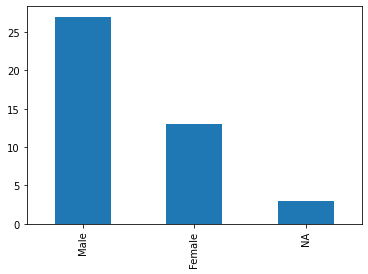

In [80]:
peopledf.gender.value_counts().plot(kind="bar")

### 4.4 Las mejores 5 películas de studio Ghilbli

Ahora que sabemos los films más polulares y los personajes, podemos sacar los personajes de estas películas.

In [122]:
df[df.rt_scoreINT > 95]

,id,title,description,director,producer,release_date,rt_score,people,species,locations,vehicles,url,rt_scoreINT
1,12cfb892-aac0-4c5b-94af-521852e46d6a,Grave of the Fireflies,"In the latter part of World War II, a boy and ...",Isao Takahata,Toru Hara,1988,97,[https://ghibliapi.herokuapp.com/people/],[https://ghibliapi.herokuapp.com/species/af391...,[https://ghibliapi.herokuapp.com/locations/],[https://ghibliapi.herokuapp.com/vehicles/],https://ghibliapi.herokuapp.com/films/12cfb892...,97
3,ea660b10-85c4-4ae3-8a5f-41cea3648e3e,Kiki's Delivery Service,"A young witch, on her mandatory year of indepe...",Hayao Miyazaki,Hayao Miyazaki,1989,96,[https://ghibliapi.herokuapp.com/people/],[https://ghibliapi.herokuapp.com/species/af391...,[https://ghibliapi.herokuapp.com/locations/],[https://ghibliapi.herokuapp.com/vehicles/],https://ghibliapi.herokuapp.com/films/ea660b10...,96
4,4e236f34-b981-41c3-8c65-f8c9000b94e7,Only Yesterday,"It’s 1982, and Taeko is 27 years old, unmarrie...",Isao Takahata,Toshio Suzuki,1991,100,[https://ghibliapi.herokuapp.com/people/],[https://ghibliapi.herokuapp.com/species/af391...,[https://ghibliapi.herokuapp.com/locations/],[https://ghibliapi.herokuapp.com/vehicles/],https://ghibliapi.herokuapp.com/films/4e236f34...,100
10,dc2e6bd1-8156-4886-adff-b39e6043af0c,Spirited Away,Spirited Away is an Oscar winning Japanese ani...,Hayao Miyazaki,Toshio Suzuki,2001,97,[https://ghibliapi.herokuapp.com/people/],[https://ghibliapi.herokuapp.com/species/af391...,[https://ghibliapi.herokuapp.com/locations/],[https://ghibliapi.herokuapp.com/vehicles/],https://ghibliapi.herokuapp.com/films/dc2e6bd1...,97
18,578ae244-7750-4d9f-867b-f3cd3d6fecf4,The Tale of the Princess Kaguya,A bamboo cutter named Sanuki no Miyatsuko disc...,Isao Takahata,Yoshiaki Nishimura,2013,100,[https://ghibliapi.herokuapp.com/people/],[https://ghibliapi.herokuapp.com/species/af391...,[https://ghibliapi.herokuapp.com/locations/],[https://ghibliapi.herokuapp.com/vehicles/],https://ghibliapi.herokuapp.com/films/578ae244...,100


In [143]:
df[df.rt_scoreINT > 95].title

1              Grave of the Fireflies
3             Kiki's Delivery Service
4                      Only Yesterday
10                      Spirited Away
18    The Tale of the Princess Kaguya
Name: title, dtype: object

### 4.5 Location

In [151]:
locationdf = pd.DataFrame(location)
locationdf.head()

,id,name,climate,terrain,surface_water,residents,films,url
0,11014596-71b0-4b3e-b8c0-1c4b15f28b9a,Irontown,Continental,Mountain,40,[https://ghibliapi.herokuapp.com/people/ba9246...,[https://ghibliapi.herokuapp.com/films/0440483...,[https://ghibliapi.herokuapp.com/locations/110...
1,64a996aa-481e-4627-9624-ab23f59a05a9,Gutiokipanja,Continental,Hill,50,[https://ghibliapi.herokuapp.com/people/ba9246...,[https://ghibliapi.herokuapp.com/films/0440483...,[https://ghibliapi.herokuapp.com/locations/64a...
2,a8bd9c03-7c80-4a97-b7c0-6a668acaf576,The Cat Kingdom,Continental,Plain,30,[https://ghibliapi.herokuapp.com/people/6b3fac...,[https://ghibliapi.herokuapp.com/films/90b7251...,[https://ghibliapi.herokuapp.com/locations/a8b...
3,56e423c4-d9a1-44c4-8bdb-1cab45fbf63e,The Marsh House,Mild,Marsh,60,[],[https://ghibliapi.herokuapp.com/films/5fdfb32...,[https://ghibliapi.herokuapp.com/locations/56e...
4,660c8c91-bd92-43db-b475-b2df6ca96fec,Hospital,Continental,Hill,40,[TODO],[https://ghibliapi.herokuapp.com/films/5861112...,[https://ghibliapi.herokuapp.com/locations/660...


### 4.6 Species

In [153]:
speciesdf = pd.DataFrame(species)
speciesdf

,id,name,classification,eye_colors,hair_colors,people,films,url
0,af3910a6-429f-4c74-9ad5-dfe1c4aa04f2,Human,Mammal,"Black, Blue, Brown, Grey, Green, Hazel","Black, Blonde, Brown, Grey, White",[https://ghibliapi.herokuapp.com/people/ba9246...,[https://ghibliapi.herokuapp.com/films/2baf70d...,https://ghibliapi.herokuapp.com/species/af3910...
1,6bc92fdd-b0f4-4286-ad71-1f99fb4a0d1e,Deer,Elk,"Black, Red","Brown, Light Orange",[https://ghibliapi.herokuapp.com/people/030555...,[https://ghibliapi.herokuapp.com/films/0440483...,https://ghibliapi.herokuapp.com/species/6bc92f...
2,b5a92d0e-5fb4-43d4-ba60-c012135958e4,Spirit,Spirit,Red,Light Orange,[https://ghibliapi.herokuapp.com/people/ca568e...,[https://ghibliapi.herokuapp.com/films/0440483...,htps://ghibliapi.herokuapp.com/species/b5a92d0...
3,f25fa661-3073-414d-968a-ab062e3065f7,God,God,Brown,White,[https://ghibliapi.herokuapp.com/people/e9356b...,[https://ghibliapi.herokuapp.com/films/0440483...,https://ghibliapi.herokuapp.com/species/f25fa6...
4,603428ba-8a86-4b0b-a9f1-65df6abef3d3,Cat,Mammal,"Brown, Black, Yellow, White, Emerald, Blue, Green","White, Black, Brown, Beige, Grey, Yellow",[https://ghibliapi.herokuapp.com/people/7151ab...,[https://ghibliapi.herokuapp.com/films/5861112...,https://ghibliapi.herokuapp.com/species/603428...
5,74b7f547-1577-4430-806c-c358c8b6bcf5,Totoro,Mammal,Grey,Grey,[https://ghibliapi.herokuapp.com/people/d39dee...,[https://ghibliapi.herokuapp.com/films/5861112...,https://ghibliapi.herokuapp.com/species/74b7f5...


### 4.7 Vehicles

In [159]:
vehiclesdf = pd.DataFrame(vehicles)
vehiclesdf.head()

,id,name,description,vehicle_class,length,pilot,films,url
0,4e09b023-f650-4747-9ab9-eacf14540cfb,Air Destroyer Goliath,A military airship utilized by the government ...,Airship,"1,000",https://ghibliapi.herokuapp.com/people/40c005c...,https://ghibliapi.herokuapp.com/films/2baf70d1...,https://ghibliapi.herokuapp.com/vehicles/4e09b...
1,d8f893b5-1dd9-41a1-9918-0099c1aa2de8,Red Wing,An experimental aircraft captured by Porco. Na...,Airplane,20,https://ghibliapi.herokuapp.com/people/6523068...,https://ghibliapi.herokuapp.com/films/ebbb6b7c...,https://ghibliapi.herokuapp.com/vehicles/d8f89...
2,923d70c9-8f15-4972-ad53-0128b261d628,Sosuke's Boat,A toy boat where Sosuke plays,Boat,10,https://ghibliapi.herokuapp.com/people/a10f64f...,https://ghibliapi.herokuapp.com/films/758bf02e...,https://ghibliapi.herokuapp.com/vehicles/923d7...
